# 1、图片预处理

In [4]:
inpt_shape=150 #图片纬度
batch_size=50  #批次大小

In [16]:
from keras.preprocessing.image import  ImageDataGenerator,load_img,img_to_array  #数据增强
import tensorflow as tf
#定义数据增增强器
train_datagen=ImageDataGenerator(
                            rescale=1/255,    #数据归一化
                            )   
path=r"/home/bdai/718/tensroflow2022/2_CNN/case/case2_dog_or_cat/data/train"
train_data=train_datagen.flow_from_directory(directory=path,
                                            batch_size=batch_size,      #批次
                                            target_size=(inpt_shape,inpt_shape),  #图片的纬度
                                            class_mode="binary"  #二分类
                                            )
train_label=train_data.classes #训练集标签
print(len(train_label))
train_images, _ = next(train_data)  #转化后的数据

#测试数据
path1=r"/home/bdai/718/tensroflow2022/2_CNN/case/case2_dog_or_cat/data/test"
test_datagen=ImageDataGenerator(rescale=1/255)  
test_data=test_datagen.flow_from_directory(directory=path1,
                                            batch_size=batch_size,      #批次
                                            target_size=(inpt_shape,inpt_shape),  #图片的纬度
                                            class_mode="binary"  #二分类
                                            )   

                                            
test_label=test_data.classes #测试集标签
print(test_label)
test_images, _ = next(test_data)  #转化后的数据

#查看分类
train_class=train_data.class_indices
print(train_class)
#查看图片属性
print(train_data.image_shape)

Found 8005 images belonging to 2 classes.
8005
Found 2019 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
{'cats': 0, 'dogs': 1}
(150, 150, 3)


161


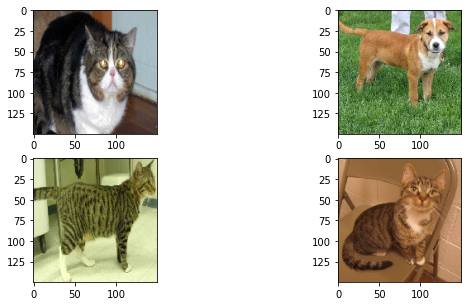

In [17]:
import matplotlib.pyplot as plt 
train_images, _ = next(train_data)  #转化后的数据
print(len(train_data))
#创建画布
plt.figure(figsize=(10,5))
#显示图像
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(train_images[i])

# 2、构建模型

In [14]:
model=tf.keras.Sequential([
    #卷积层s
    tf.keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            activation="relu",
                            padding="same",
                            input_shape=(inpt_shape,inpt_shape,3) #3代表的是RGB图像
                            ),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
    #全连接层
    tf.keras.layers.Flatten(),  #数据扁平化
    #hidden layer
    tf.keras.layers.Dense(units=100,activation="relu"),
    #output layer
    tf.keras.layers.Dense(units=1,  #二分类，输出结果的一个
                        activation="sigmoid")  #二分类问题
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss="binary_crossentropy",  #二元交叉熵
            metrics=["accuracy"])
#model.summary()  #查看模型参数
 #模型训练

hist=model.fit_generator(train_data,epochs=10,validation_data=test_data)
#模型验证
print(model.evaluate_generator(test_data))


2022-04-09 21:50:35.841957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 21:50:35.861570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 21:50:35.862161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 21:50:35.863623: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/10


2022-04-09 21:50:39.317017: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204


161/161 [==============================] - 49s 288ms/step - loss: 1.1283 - accuracy: 0.5781 - val_loss: 0.6517 - val_accuracy: 0.6404
Epoch 2/10
161/161 [==============================] - 45s 282ms/step - loss: 0.6336 - accuracy: 0.6452 - val_loss: 0.5971 - val_accuracy: 0.6929
Epoch 3/10
161/161 [==============================] - 46s 285ms/step - loss: 0.6028 - accuracy: 0.6777 - val_loss: 0.5829 - val_accuracy: 0.6914
Epoch 4/10
161/161 [==============================] - 45s 279ms/step - loss: 0.5950 - accuracy: 0.6812 - val_loss: 0.6118 - val_accuracy: 0.6736
Epoch 5/10
161/161 [==============================] - 45s 280ms/step - loss: 0.5772 - accuracy: 0.6897 - val_loss: 0.5591 - val_accuracy: 0.7053
Epoch 6/10
161/161 [==============================] - 45s 278ms/step - loss: 0.5690 - accuracy: 0.6999 - val_loss: 0.5649 - val_accuracy: 0.6845
Epoch 7/10
161/161 [==============================] - 45s 280ms/step - loss: 0.5618 - accuracy: 0.7089 - val_loss: 0.5464 - val_accuracy: 0.7

/tmp/ipykernel_576103/3708203992.py:26: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print(model.evaluate_generator(test_data))


[0.5649480819702148, 0.7062902450561523]


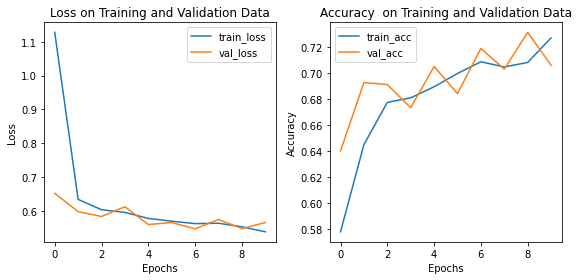

In [15]:
# define the function
def training_vis(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['accuracy']  # new version => hist.history['accuracy'] 
    val_acc = hist.history['val_accuracy'] #=> hist.history['val_accuracy'] 
    
    # make a figure
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

training_vis(hist)

# 3、模型优化

## 3.1 去拟合

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_2 (Dense)             (None, 100)              

/tmp/ipykernel_535737/3824312766.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_data,epochs=10,validation_data=test_data)


Epoch 1/10
161/161 [==============================] - 27s 166ms/step - loss: 0.7185 - accuracy: 0.5709 - val_loss: 0.6185 - val_accuracy: 0.6387
Epoch 2/10
161/161 [==============================] - 31s 193ms/step - loss: 0.6062 - accuracy: 0.6667 - val_loss: 0.5647 - val_accuracy: 0.7009
Epoch 3/10
161/161 [==============================] - 26s 163ms/step - loss: 0.5381 - accuracy: 0.7268 - val_loss: 0.5517 - val_accuracy: 0.7113
Epoch 4/10
161/161 [==============================] - 26s 163ms/step - loss: 0.4560 - accuracy: 0.7858 - val_loss: 0.5519 - val_accuracy: 0.7311
Epoch 5/10
161/161 [==============================] - 26s 164ms/step - loss: 0.3853 - accuracy: 0.8269 - val_loss: 0.5649 - val_accuracy: 0.7247
Epoch 6/10
161/161 [==============================] - 26s 165ms/step - loss: 0.2864 - accuracy: 0.8786 - val_loss: 0.6116 - val_accuracy: 0.7385
Epoch 7/10
161/161 [==============================] - 26s 164ms/step - loss: 0.1899 - accuracy: 0.9284 - val_loss: 0.7079 - val_ac

/tmp/ipykernel_535737/3824312766.py:38: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print(model.evaluate_generator(test_data))


[1.0739344358444214, 0.7320810556411743]


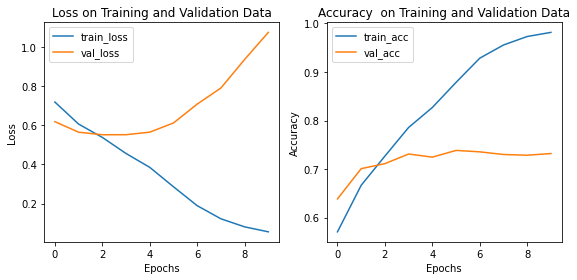

In [7]:
model=tf.keras.Sequential([
    #卷积层s
    tf.keras.layers.Conv2D(filters=64,    
                            kernel_size=3,
                            activation="relu",
                            padding="same",
                            input_shape=(inpt_shape,inpt_shape,3) #3代表的是RGB图像
                            ),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),

    tf.keras.layers.Conv2D(filters=64,   
                            kernel_size=3,
                            activation="relu",
                            padding="same",
                            input_shape=(int(inpt_shape/2),int(inpt_shape/2),3) #3代表的是RGB图像
                            ),
                            
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
    #全连接层
    tf.keras.layers.Flatten(),  #数据扁平化
    #hidden layer
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dropout(0.3),   #<-----------------------------
    #output layer
    tf.keras.layers.Dense(units=1,  #二分类，输出结果的一个
                        activation="sigmoid")  #二分类问题
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss="binary_crossentropy",  #二元交叉熵
            metrics=["accuracy"])
model.summary()  #查看模型参数
 #模型训练
 
hist=model.fit_generator(train_data,epochs=10,validation_data=test_data)

#模型验证
print(model.evaluate_generator(test_data))

# define the function
def training_vis(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['accuracy']  # new version => hist.history['accuracy'] 
    val_acc = hist.history['val_accuracy'] #=> hist.history['val_accuracy'] 
    
    # make a figure
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

training_vis(hist)

## 3.2 借助kerastuner.tuners


In [15]:
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters
import tensorflow as tf
import matplotlib.pyplot as plt
hp=HyperParameters()
def bt_model(hp):
    model=tf.keras.Sequential([
    #卷积层s
    tf.keras.layers.Conv2D(filters=hp.Choice("filter1",values=[16,64],default=16),    
                            kernel_size=3,
                            activation="relu",
                            padding="same",
                            input_shape=(inpt_shape,inpt_shape,3) #3代表的是RGB图像
                            ),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=3),

    tf.keras.layers.Conv2D(filters=hp.Choice("filter2",values=[16,64],default=16),   
                            kernel_size=3,
                            activation="relu",
                            padding="same",
                            input_shape=(int(inpt_shape/2),int(inpt_shape/2),3) #3代表的是RGB图像
                            ),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=3),

    #全连接层
    tf.keras.layers.Flatten(),  #数据扁平化
    tf.keras.layers.Dense(units=hp.Int("inpt_units",min_value=128,max_value=1000,step=32),activation="relu"),
    tf.keras.layers.Dropout(0.3),  

    #hidden layer
    tf.keras.layers.Dense(units=hp.Int("hidden_units",min_value=128,max_value=1000,step=32),activation="relu"),
    tf.keras.layers.Dropout(0.3),   

    #output layer
    tf.keras.layers.Dense(units=1,  #二分类，输出结果的一个
                        activation="sigmoid")  #二分类问题
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss="binary_crossentropy",  #二元交叉熵
            metrics=["accuracy"])
    return model

tuner=Hyperband(
    hypermodel=bt_model,  #优化对象
    objective="val_accuracy",  #用测试集得精确度作为参数选择的标准
    max_epochs=4,  #最大训练次数
    directory="fashion_parameters",  #保存参数的文件夹
    project_name='fashion',  #
    hyperparameters=hp  #使用的变量
)
tuner.search(train_data,epochs=10,validation_data=test_data) #搜索参数

Trial 10 Complete [00h 02m 30s]
val_accuracy: 0.7275879383087158

Best val_accuracy So Far: 0.7617632746696472
Total elapsed time: 00h 15m 27s
INFO:tensorflow:Oracle triggered exit


In [16]:
best_hp=tuner.get_best_hyperparameters(1)[0]  #获取最佳参数
print(best_hp.values)

{'filter1': 16, 'filter2': 64, 'inpt_units': 480, 'hidden_units': 448, 'tuner/epochs': 4, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [17]:
'''最佳参数模型'''
#用这些参数构建最佳模型
best_model=tuner.hypermodel.build(best_hp)  #最佳模型
best_model.summary()

#模型训练
hist=best_model.fit_generator(train_data,epochs=10,validation_data=test_data)
#模型验证
print(best_model.evaluate_generator(test_data))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        9280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 18496)             0         
                                                                 
 dense_3 (Dense)             (None, 480)              

/tmp/ipykernel_555878/1141931625.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=best_model.fit_generator(train_data,epochs=10,validation_data=test_data)


161/161 [==============================] - 32s 194ms/step - loss: 0.6519 - accuracy: 0.6034 - val_loss: 0.5567 - val_accuracy: 0.7256
Epoch 2/10
161/161 [==============================] - 26s 162ms/step - loss: 0.5251 - accuracy: 0.7458 - val_loss: 0.5198 - val_accuracy: 0.7400
Epoch 3/10
161/161 [==============================] - 26s 161ms/step - loss: 0.4274 - accuracy: 0.8044 - val_loss: 0.5305 - val_accuracy: 0.7420
Epoch 4/10
161/161 [==============================] - 26s 162ms/step - loss: 0.3286 - accuracy: 0.8587 - val_loss: 0.5825 - val_accuracy: 0.7415
Epoch 5/10
161/161 [==============================] - 26s 162ms/step - loss: 0.2087 - accuracy: 0.9169 - val_loss: 0.6983 - val_accuracy: 0.7524
Epoch 6/10
161/161 [==============================] - 26s 162ms/step - loss: 0.1322 - accuracy: 0.9497 - val_loss: 0.8309 - val_accuracy: 0.7424
Epoch 7/10
161/161 [==============================] - 26s 162ms/step - loss: 0.0882 - accuracy: 0.9693 - val_loss: 0.8911 - val_accuracy: 0.7

/tmp/ipykernel_555878/1141931625.py:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print(best_model.evaluate_generator(test_data))


[1.3052786588668823, 0.7251114249229431]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(test_images[6])
x=np.expand_dims(test_images[6],axis=0)  #扩大纬度
images=np.vstack([x])    #想向量拉长
pred=best_model.predict(images)
if pred>0.5:
    print("this is a dog")
else:
    print("this is a cat")


NameError: name 'test_images' is not defined

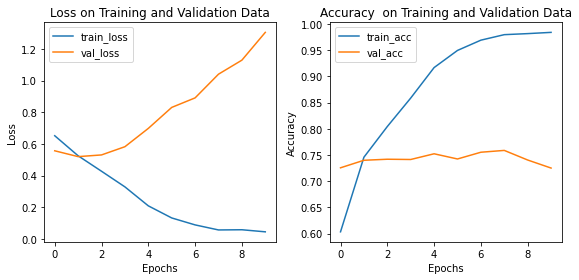

In [18]:
'''模型可视化'''
import matplotlib.pyplot as plt
# define the function
def training_vis(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['accuracy']  # new version => hist.history['accuracy'] 
    val_acc = hist.history['val_accuracy'] #=> hist.history['val_accuracy'] 
    
    # make a figure
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

training_vis(hist)